1. Import Library

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


2. Eksplorasi Data : Memahami Data dengan Statistik - Part 1

In [45]:
# Load dataset
dataset = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv")

display(dataset.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [46]:
print('Shape dataset %d rows and %d columns  ' %dataset.shape)
print("\nInformasi dataset : ")
print(dataset.info())
print("\nStatistik Deskriftif : ")
display(dataset.describe())

Shape dataset 12330 rows and 18 columns  

Informasi dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region      

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


3. Eksplorasi Data : Memahami Data dengan Statistik - Part 2

In [47]:
dataset_column_number = dataset.select_dtypes(exclude="object").corr()

print("Korelasi dataset: ")
display(dataset_column_number)

print("Distribusi Label (Revenue): ")
print(dataset["Revenue"].value_counts())

# Tugas Praktek
print("\nKorelasi BounceRates-ExitRates: ", dataset_column_number.loc["BounceRates","ExitRates"])
print("\nKorelasi Revenue-PageValues: ", dataset_column_number.loc["Revenue","PageValues"])
print("\nKorelasi TrafficType-Weekend: ", dataset_column_number.loc["TrafficType","Weekend"])

Korelasi dataset: 


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601466,0.376782,0.255757,0.430832,0.373647,-0.223474,-0.316192,0.098771,-0.095054,-0.006459,-0.025243,-0.005680,-0.033748,0.026404,0.138631
Administrative_Duration,0.601466,1.000000,0.302647,0.237959,0.288869,0.355238,-0.144128,-0.205618,0.067463,-0.073472,-0.007425,-0.015525,-0.005681,-0.014487,0.014987,0.093395
Informational,0.376782,0.302647,1.000000,0.618965,0.374098,0.387446,-0.116071,-0.163539,0.048539,-0.048328,-0.009435,-0.038257,-0.029442,-0.034510,0.035557,0.095085
Informational_Duration,0.255757,0.237959,0.618965,1.000000,0.279966,0.347300,-0.074077,-0.105205,0.030787,-0.030658,-0.009596,-0.019346,-0.027244,-0.024731,0.024054,0.070250
ProductRelated,0.430832,0.288869,0.374098,0.279966,1.000000,0.860868,-0.204469,-0.292219,0.056067,-0.024190,0.004193,-0.013326,-0.038318,-0.043235,0.016097,0.158280
ProductRelated_Duration,0.373647,0.355238,0.387446,0.347300,0.860868,1.000000,-0.184409,-0.251645,0.052623,-0.036598,0.002885,-0.007549,-0.033263,-0.036538,0.007293,0.152130
BounceRates,-0.223474,-0.144128,-0.116071,-0.074077,-0.204469,-0.184409,1.000000,0.913436,-0.119357,0.073088,0.023965,-0.016009,-0.006731,0.078894,-0.046870,-0.150621
ExitRates,-0.316192,-0.205618,-0.163539,-0.105205,-0.292219,-0.251645,0.913436,1.000000,-0.174397,0.102899,0.014745,-0.004407,-0.008836,0.078998,-0.062942,-0.206886
PageValues,0.098771,0.067463,0.048539,0.030787,0.056067,0.052623,-0.119357,-0.174397,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.095054,-0.073472,-0.048328,-0.030658,-0.024190,-0.036598,0.073088,0.102899,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


Distribusi Label (Revenue): 
False    10422
True      1908
Name: Revenue, dtype: int64

Korelasi BounceRates-ExitRates:  0.9134364214595573

Korelasi Revenue-PageValues:  0.49256929525120574

Korelasi TrafficType-Weekend:  -0.0022212292430310644


4. Eksplorasi Data : Memahami Data dengan Visual

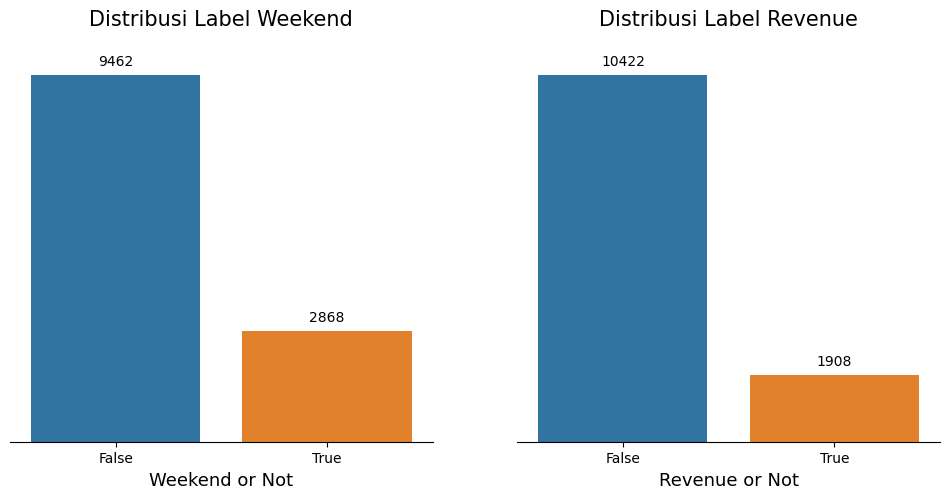

In [48]:
# Checking the Distribution of Customers on Revenue

# 1. Membuat Canvas 
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 2. Membuat Plot
columns_label = ["Weekend", "Revenue"]
for i, col in enumerate(columns_label):
  # 2.1. Membuat Plot Menggunakan Seaborn Countplot
  sns.countplot(data=dataset, x=col, ax=axs[i])
  axs[i].set_title("Distribusi Label %s\n"%(col), fontsize=15)
  axs[i].set_xlabel("%s or Not"%(col), fontsize=13)
  # 2.2. Membuat Annotasi
  for p in axs[i].patches:
    axs[i].annotate(
      format(p.get_height(), ".0f"),
      xy = (p.get_x() + p.get_width()/2, p.get_height()),
      ha = "center",
      va = "center",
      xytext = (0, 10),
      textcoords = "offset points"
    )
  # 2.3. Setting Plot
  sns.despine(right=True, top=True, left=True)
  axs[i].axes.yaxis.set_visible(False)
plt.show()

5. Tugas Praktek

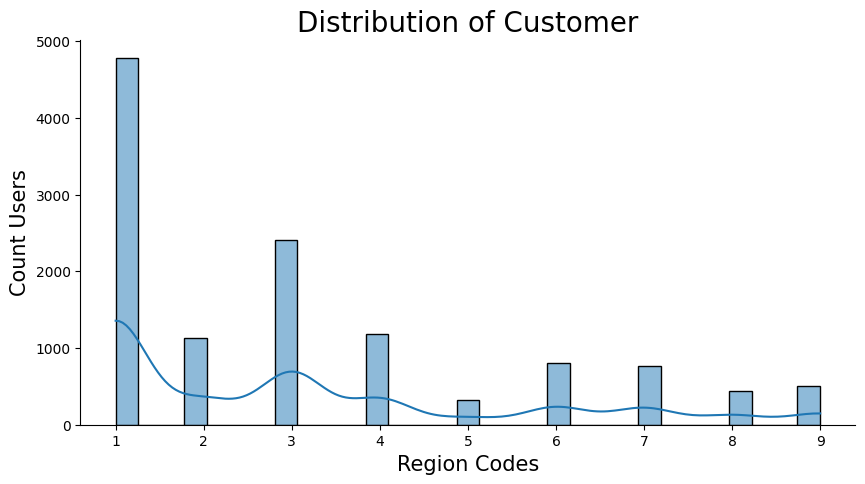

In [49]:
# 1. Membuat Canvas
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

# 2. Visualizing The Distribution of Customers around the Region
sns.histplot(data=dataset, x = "Region", kde=True, ax=axs)
plt.title("Distribution of Customer", fontsize=20)
plt.xlabel("Region Codes", fontsize=15)
plt.ylabel("Count Users", fontsize=15)
sns.despine(top=True)
plt.show()

6. Data Pre - Processing: Handling Missing Value - Part 1

In [50]:
# Checking Missing Value for Each Feature
print("Checking missing value for each feature")
print(dataset.isnull().sum())

# Counting Total Missing Value
print("\nCounting Total Missing Value")
print(dataset.isnull().sum().sum())

Checking missing value for each feature
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting Total Missing Value
112


7. Data Pre - Processing: Handling Missing Value - Part 2

In [51]:
# Drop rows With Missing Value
dataset_clean = dataset.dropna()
print("Ukuran dataset_original adalah %d baris dan %d kolom"%dataset.shape)
print("Ukuran dataset_clean adalah %d baris dan %d kolom"%dataset_clean.shape)

Ukuran dataset_original adalah 12330 baris dan 18 kolom
Ukuran dataset_clean adalah 12316 baris dan 18 kolom


8. Data Pre - Processing Handling Missing Value - Part 3

In [52]:
print("Before Imputation")
# Checking Missing Value for Each Feature
print(dataset.isnull().sum())
# Counting Total Missing Value 
print(dataset.isnull().sum().sum())

print("\nAfter Imputation")
columns_with_missing_value = dataset.columns[dataset.isnull().any()].tolist()
dataset_clean = dataset.fillna(dataset[columns_with_missing_value].mean())
# Checking Missing Value for Each Feature 
print(dataset_clean.isnull().sum())
# Counting Total Missing Value
print(dataset_clean.isnull().sum().sum())

Before Imputation
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After Imputation
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
T

9. Tugas Praktek : Handling Missing Value With Imputation Methode by Median Value

In [53]:
# Mengcopy dataset dari dataset original
dataset1 = dataset.copy()

# Checking dimension of dataset
print("Ukuran dataset 1 adalah %d baris dan %d kolom"%dataset1.shape)

print("Before Imputation")
# Checking Missing Value for Each Features
print(dataset1.isnull().sum())
# Counting Total of Missing Value
print(dataset1.isnull().sum().sum())

print("After Imputation")

Ukuran dataset 1 adalah 12330 baris dan 18 kolom
Before Imputation
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112
After Imputation


10. Data Pre-Processing: Scalling

In [54]:
# Load dataset
dataset_clean = dataset.copy()

# Data Pre - Processing Handling Missing Value With Imputation Method by Mean Value
columns_with_missing_value = dataset_clean.columns[dataset_clean.isnull().any()].tolist()
dataset_clean = dataset_clean.fillna(dataset_clean[columns_with_missing_value].mean())

# Define MinMaxScaller
scaler = MinMaxScaler()

# List all the feature that need to be scaled
scalling_column = dataset_clean.select_dtypes(include="float64").columns.to_list()
scalling_column.remove("SpecialDay")

# Apply fit_transform to scale selected feature
dataset_clean[scalling_column] = scaler.fit_transform(dataset_clean[scalling_column])

# Show Min Max value for each columns
display(dataset_clean.describe().T[["min","max"]])

,min,max
Administrative,0.0,1.0
Administrative_Duration,0.0,1.0
Informational,0.0,1.0
Informational_Duration,0.0,1.0
ProductRelated,0.0,1.0
ProductRelated_Duration,0.0,1.0
BounceRates,0.0,1.0
ExitRates,0.0,1.0
PageValues,0.0,1.0
SpecialDay,0.0,1.0


11. Data Pre - Processing: Konversi String to Numeric

In [55]:
# List of all column that have object
object_column = dataset_clean.select_dtypes(include="object").columns.to_list()

for i, col in enumerate(object_column):
  LE = LabelEncoder()
  dataset_clean[col] = LE.fit_transform(dataset_clean[col])
  print(LE.classes_)
  print(sorted(dataset_clean[col].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['New_Visitor' 'Other' 'Returning_Visitor']
[0, 1, 2]


12. Features & Label

In [56]:
# Removing the target column Revenue from dataset and assigning to X
X = dataset_clean.drop(["Revenue"], axis = 1)

# Assigning The Target Column Revenue to y
y = dataset_clean["Revenue"]

# Checking The Shapes
print("Dimensi X = %d baris dan %d kolom"%X.shape)
print("Dimensi Y = %d baris"%y.shape)

Dimensi X = 12330 baris dan 17 kolom
Dimensi Y = 12330 baris


13. Training dan Test Dataset

In [57]:
# Splitting the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Checking the shape
print("Shape of X_train %d baris dan %d kolom"%X_train.shape)
print("Shape of y_train %d baris"%y_train.shape)
print("Shape of X_test %d baris dan %d kolom"%X_test.shape)
print("Shape of y_test %d baris"%y_test.shape)

Shape of X_train 9864 baris dan 17 kolom
Shape of y_train 9864 baris
Shape of X_test 2466 baris dan 17 kolom
Shape of y_test 2466 baris


14. Training Model: Fit

In [58]:
# Call the classifier
model_DTS = DecisionTreeClassifier()

# Fit the classifier to the training data
model_DTS = model_DTS.fit(X_train, y_train)


15. Training Model: Predict

In [59]:
# Apply the classifier / model to the test data
y_pred = model_DTS.predict(X_test)
print(y_pred.shape)

(2466,)


16. Evaluasi Model Performance

In [60]:
# Evaluating the model
print("Training Accuracy: ", model_DTS.score(X_train, y_train))
print("Testing Accuracy: ", model_DTS.score(X_test, y_test))

# Confusion Matrix
print("\nConfusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(cm)
print("tn = %d"%tn)
print("fp = %d"%fp)
print("fn = %d"%fn)
print("tp = %d"%tp)

# Classification Report
print("\nClassification Report")
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy:  1.0
Testing Accuracy:  0.8600973236009732

Confusion Matrix: 
[[1893  151]
 [ 194  228]]
tn = 1893
fp = 151
fn = 194
tp = 228

Classification Report
              precision    recall  f1-score   support

       False       0.91      0.93      0.92      2044
        True       0.60      0.54      0.57       422

    accuracy                           0.86      2466
   macro avg       0.75      0.73      0.74      2466
weighted avg       0.85      0.86      0.86      2466



17. Pakai Metrick Yang Mana ?

1. Jika FN = FP -> Accuracy
2. Jika FN > FP || FN < FP -> F1 - Score
3. Jika FP Lebih Baik Terjadi -> Recall -> Kasus Fraud Scam
4. Jika FN Lebih Baik Terjadi -> Precision -> SPAM Email

18. Pemodelan Permasalahan Klasifikasi dengan Logistic Regression

In [61]:
# Call the Logistic Regression
model_logreg = LogisticRegression(max_iter=300)

# Fit the classifier to the training data
model_logreg = model_logreg.fit(X_train, y_train)

# Training model: Predict
y_predict = model_logreg.predict(X_test)

# Evaluate Model Performance
print("Training Accuracy: ", model_logreg.score(X_train, y_train))
print("Testing Accuracy: ", model_logreg.score(X_test, y_test))

# Confusion Matrix
print("\nConfusion Matrix")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# Classification Report
print("\nClassification Report")
cr = classification_report(y_test, y_predict)
print(cr)

Training Accuracy:  0.880271695052717
Testing Accuracy:  0.8564476885644768

Confusion Matrix
[[2009   35]
 [ 319  103]]

Classification Report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.75      0.24      0.37       422

    accuracy                           0.86      2466
   macro avg       0.80      0.61      0.64      2466
weighted avg       0.84      0.86      0.82      2466



19. Tugas Praktek

In [62]:
# Load dataset
dataset = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv")

# Information of Dataset
print(dataset.info())

# Handle Missing Value With Imputation Methode using Mean Value
column_that_have_missing_value = dataset.columns[dataset.isnull().any()].to_list()
dataset_clean = dataset.fillna(dataset[column_that_have_missing_value].mean())

print(dataset_clean.info())

# Show Statistic Description
print(dataset_clean.describe().T[["min","max","mean"]])

# Data Pre - Processing: Konversi Object Data Into Numeric Data
column_that_have_object_type = dataset_clean.select_dtypes(include="object").columns.to_list()

for i, col in enumerate(column_that_have_object_type):
  LE = LabelEncoder()
  dataset_clean[col] = LE.fit_transform(dataset_clean[col])
  print("\n",LE.classes_)
  print(sorted(dataset_clean[col].unique()))

# Removing The Target Column Revenue from Dataset and assigning to X
X = dataset_clean.drop(["Revenue"], axis = 1)
y = dataset_clean["Revenue"]

# Splitting the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# Call the classifier
model_DTC = DecisionTreeClassifier()

# Fit the classifier to the training data
model_DTC = model_DTC.fit(X_train, y_train)

# Testing Model: Predict
y_predict = model_DTC.predict(X_test)

# Evaluating the model_DTC performance
print("\nTraining Accuracy = %f"%model_DTC.score(X_train, y_train))
print("Testing Accuracy = %f"%model_DTC.score(X_test, y_test))

# Confusion Matrix
print("\nConfusion Matrix")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# Classification Report
print("\nClassification Report")
cr = classification_report(y_test, y_predict)
print(cr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

20. Tugas Praktek: Model Linier Regression

In [63]:
# Load Dataset
dataset_housing = pd.read_csv(r"https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv")

# Information Dataset
print(dataset_housing.info())

# Statistic Description
print(dataset_housing.describe().T[["min","mean","max"]])

# Data Scalling
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_housing[dataset_housing.columns.to_list()] = scaler.fit_transform(dataset_housing[dataset_housing.columns.to_list()])

# Statistic Description
print(dataset_housing.describe().T[["min","mean","max"]])

# Getting Independent and Dependent Variable
X = dataset_housing.drop(["MEDV"], axis = 1)
y = dataset_housing["MEDV"]

# Checking The Shapes
print("\nX Shape = %d baris dan %d kolom"%X.shape)
print("y Shape = %d baris"%y.shape)

# Splitting The Data Into Training Data and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("\nShape of X_train = %d baris %d kolom"%X_train.shape)
print("Shape of y_train = %d baris"%y_train.shape)
print("Shape of X_test = %d baris %d kolom"%X_test.shape)
print("Shape of y_test = %d baris"%y_test.shape)

# Call the Regressor
model_regressor = LinearRegression()
# Fit the regressor to the training data
model_regressor = model_regressor.fit(X_train, y_train)
# Apply the regressor / model to the test data
y_pred = model_regressor.predict(X_test)

print(y_pred.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.4 KB
None
                min           mean          max
RM            3.561       6.240288        8.398
LSTAT         1.980      12.939632       37.970
PTRATIO      12.600      18.516564       22.000
MEDV     105000.000  454342.944785  1024800.000
         min      mean  max
RM       0.0  0.553915  1.0
LSTAT    0.0  0.304519  1.0
PTRATIO  0.0  0.629422  1.0
MEDV     0.0  0.379803  1.0

X Shape = 489 baris dan 3 kolom
y Shape = 489 baris

Shape of X_train = 342 baris 3 kolom
Shape of y_train = 342 baris
Shape of X_test = 147 baris 3 kolom
Shape of y_test = 147 baris
(147,)


0.010913024655841009
0.07789896103120689
0.1044654232549747


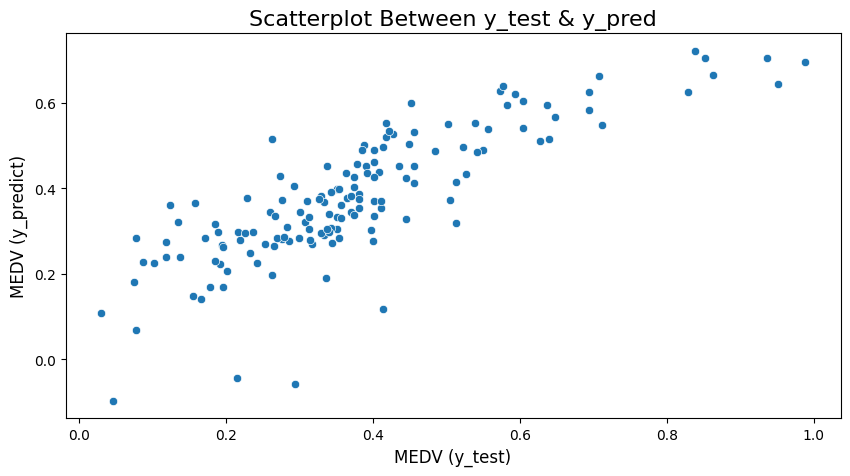

In [64]:
# Calculating MSE, lower the value better it is. O means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print(mse)

# Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print(mae)

# Calculating RMSE
rmse = np.sqrt(mse)
print(rmse)

# Plotting y_test and y_pred
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(
  x=y_test,
  y=y_pred
)
plt.title("Scatterplot Between y_test & y_pred", fontsize=16)
plt.xlabel("MEDV (y_test)", fontsize=12)
plt.ylabel("MEDV (y_predict)", fontsize=12)
plt.show()

21. Tugas Praktek: Unsupervised Learning

,CustomerID,Gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Information Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Statistik Dasar Dataset: 
                 min    max    mean
CustomerID       1.0  200.0  100.50
Age             18.0   70.0   38.85
annual_income   15.0  137.0   60.56
spending_score   1.0   99.0   50.20


,Age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


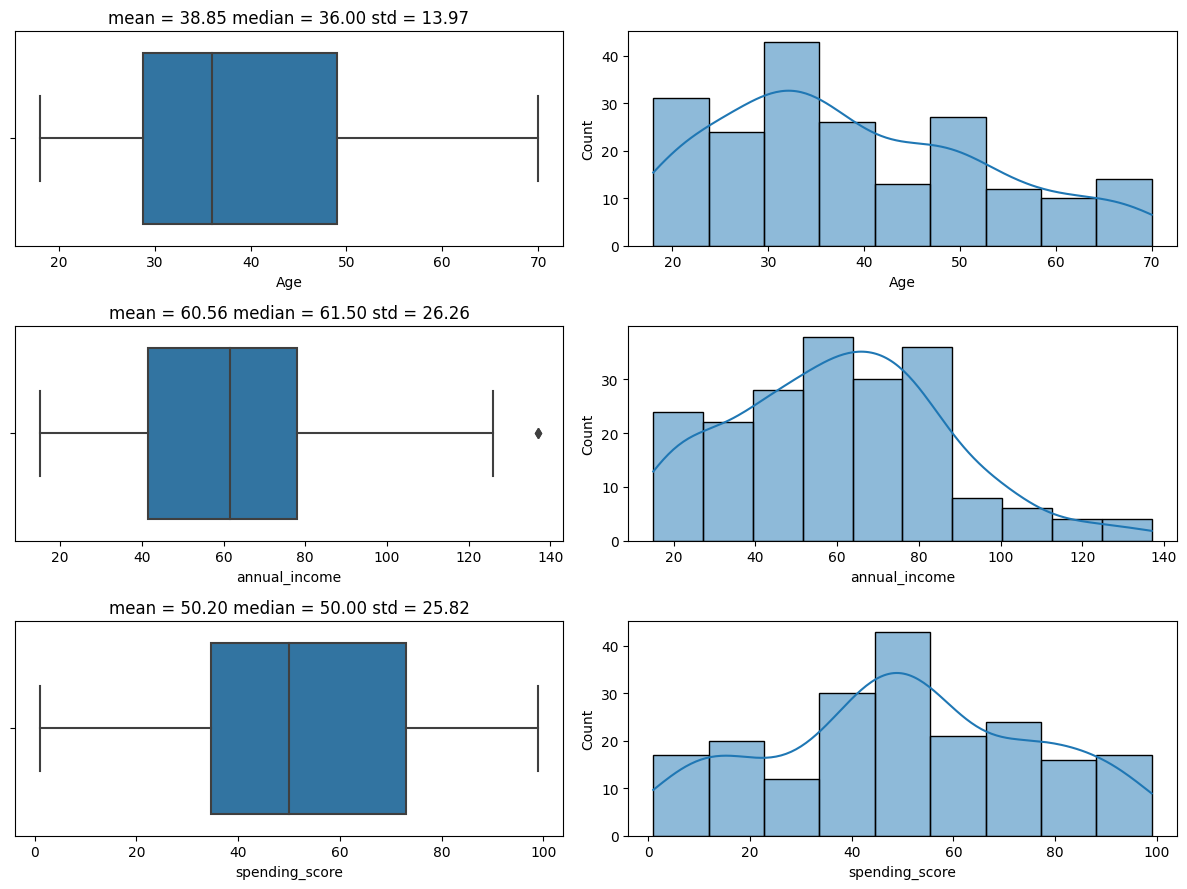

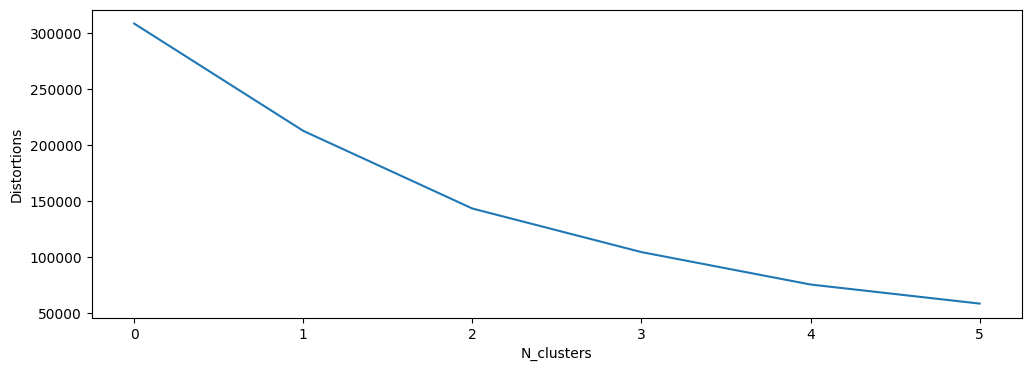

In [65]:
# Load dataset
dataset_mall_customer = pd.read_csv(r"https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv")
display(dataset_mall_customer.head())

# Information Dataset
print("Information Dataset: ")
print(dataset_mall_customer.info())

# Statistik Dasar Dataset
print("Statistik Dasar Dataset: ")
print(dataset_mall_customer.describe().T[["min","max","mean"]])

# Getting Dependent Variable
X = dataset_mall_customer[["Age","annual_income","spending_score"]]
display(X.head())

# Eksplorasi Data Numerik
fig, axs = plt.subplots(3, 2, figsize=(12, 9))
for i, col in enumerate(X.columns.to_list()):
  sns.boxplot(x = X[col], ax = axs[i][0])
  sns.histplot(data = X[col], ax = axs[i][1], kde=True)
  axs[i][0].set_title("mean = %.2f median = %.2f std = %.2f"%(X[col].mean(), X[col].median(), X[col].std()))
plt.tight_layout()
plt.show()

# Find Optiman n Cluster When Using KMeans
distortions = []
for k in range(1, 7):
  kmeansModel = KMeans(n_clusters=k, random_state=24)
  kmeansModel.fit(X)
  distortions.append(kmeansModel.inertia_)


fig, axs = plt.subplots(1, 1, figsize=(12, 4))
sns.lineplot(data=distortions)
plt.xlabel("N_clusters")
plt.ylabel("Distortions")
plt.show()

22. Menggunakan Model KMeans

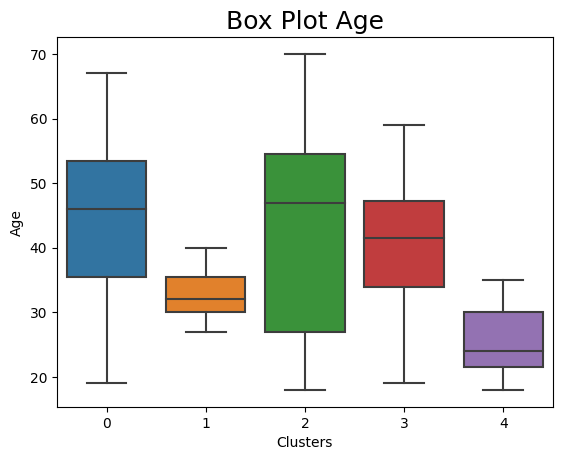

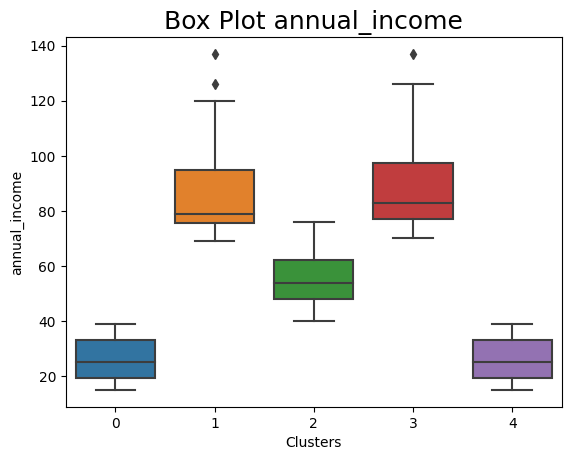

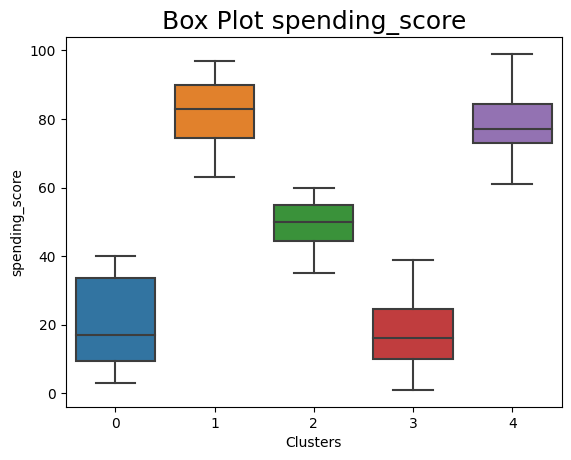

In [66]:
# Define KMeans as cluster_model
modelKMeans = KMeans(n_clusters=5, random_state=0)
clusters = modelKMeans.fit_predict(X)

# Join cluster into dataset X
X_final = X.copy()
X_final["Clusters"] = clusters

# Visualisasi Hasil Clusters
# fig, axs = plt.subplots(3, 1, figsize=(10, 7))
for i, col in enumerate(X_final.columns.to_list()[0:3]):
  sns.boxplot(data = X_final, x = "Clusters", y = col)
  plt.title("Box Plot {}".format(col), fontsize=18)
  plt.show()

23. Menamakan Cluster

In [67]:
# Menamakan Cluster
X_final["Segmen"] = X_final["Clusters"].map({
  0: "Vulnerable_Income Silver",
  1: "Top_Income Diamonds",
  2: "Middle_Income Gold",
  3: "Top_Income Silver",
  4: "Vulnerable_Income Diamonds"
})

# Menggabungkan Cluster dengan Dataset
dataset_mall_customer["Clusters"] = X_final["Clusters"].copy()
dataset_mall_customer["Segmen"] = dataset_mall_customer["Clusters"].map({
  0: "Vulnerable_Income Silver",
  1: "Top_Income Diamonds",
  2: "Middle_Income Gold",
  3: "Top_Income Silver",
  4: "Vulnerable_Income Diamonds"
})

display(X_final.head(10))
display(dataset_mall_customer.head(10))

,Age,annual_income,spending_score,Clusters,Segmen
0,19,15,39,0,Vulnerable_Income Silver
1,21,15,81,4,Vulnerable_Income Diamonds
2,20,16,6,0,Vulnerable_Income Silver
3,23,16,77,4,Vulnerable_Income Diamonds
4,31,17,40,0,Vulnerable_Income Silver
5,22,17,76,4,Vulnerable_Income Diamonds
6,35,18,6,0,Vulnerable_Income Silver
7,23,18,94,4,Vulnerable_Income Diamonds
8,64,19,3,0,Vulnerable_Income Silver
9,30,19,72,4,Vulnerable_Income Diamonds


,CustomerID,Gender,Age,annual_income,spending_score,Clusters,Segmen
0,1,Male,19,15,39,0,Vulnerable_Income Silver
1,2,Male,21,15,81,4,Vulnerable_Income Diamonds
2,3,Female,20,16,6,0,Vulnerable_Income Silver
3,4,Female,23,16,77,4,Vulnerable_Income Diamonds
4,5,Female,31,17,40,0,Vulnerable_Income Silver
5,6,Female,22,17,76,4,Vulnerable_Income Diamonds
6,7,Female,35,18,6,0,Vulnerable_Income Silver
7,8,Female,23,18,94,4,Vulnerable_Income Diamonds
8,9,Male,64,19,3,0,Vulnerable_Income Silver
9,10,Female,30,19,72,4,Vulnerable_Income Diamonds


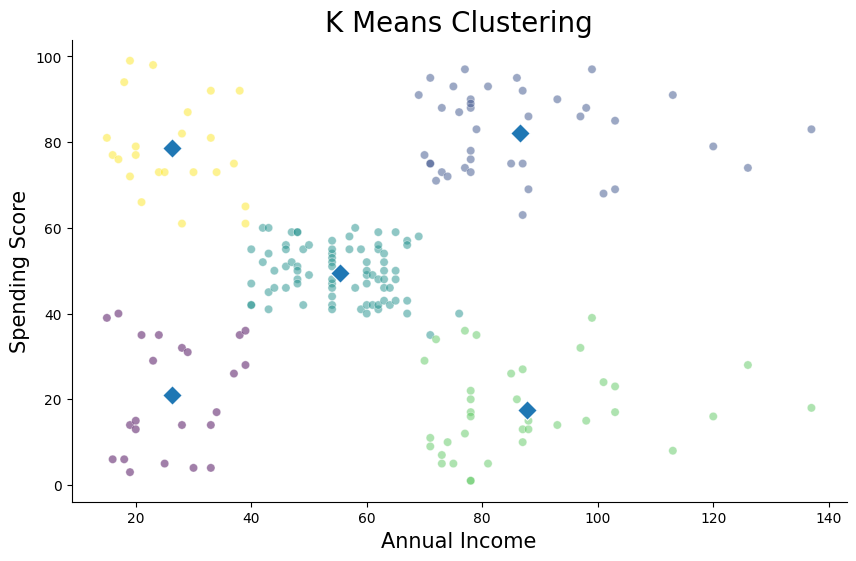

In [68]:
# Convert Dataframe to Array
X_final_array = X_final.values

# Separate X to xs and ys --> use for chart axis
xs = X_final_array[:,1]
ys = X_final_array[:,2]

# Assign the cluster centers: centroids
centroids = modelKMeans.cluster_centers_
centroids_x = centroids[:,1]
centroids_y = centroids[:,2]

# Make a scatter plot of xs and ys using labels to define the colors
fig, axs = plt.subplots(1, 1, figsize = (10,6))
sns.scatterplot(x = xs, y = ys, c = clusters, alpha = 0.5, ax = axs)
sns.scatterplot(x = centroids_x, y = centroids_y, s = 100, marker="D", ax = axs)
sns.despine(top=True)
plt.title("K Means Clustering", fontsize = 20)
plt.xlabel("Annual Income", fontsize = 15)
plt.ylabel("Spending Score", fontsize = 15)
plt.show()

24. Tugas Praktek

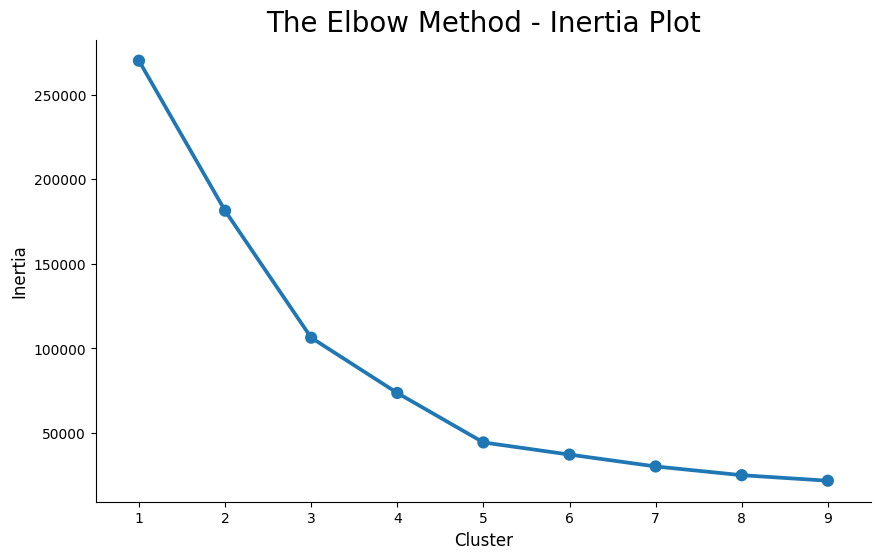

In [69]:
# Elbow Method -  Inertia Plot
inertia = {}

# Looping The Inertia Calculation for Each k
for k in range(1, 10):
  # Assign KMeans as Cluster Model
  modelKMeans = KMeans(n_clusters=k, random_state=0)
  # Fit modelKMeans 
  modelKMeans.fit(X[["annual_income","spending_score"]])
  # Get The Inertia Value
  inertia_value = modelKMeans.inertia_
  # Append The Inertia Value to Inertia List
  inertia[k] = inertia_value

# Inertia Plot
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.pointplot(x = list(inertia.keys()), y = list(inertia.values()))
sns.despine(top = True)
plt.title("The Elbow Method - Inertia Plot", fontsize = 20)
plt.xlabel("Cluster", fontsize = 12)
plt.ylabel("Inertia", fontsize = 12)
plt.show()

25. Tugas Praktek : Case Study -> Promos for Our e-commerce - Part 1

Tujuan : Mengetahui apakah seorang user internet akan mengklik Iklan atau Tidak


[1] Data eksplorasi dengan head() - info() - describe() - shape
Lima data teratas: 


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


Penjelasan Dataset : 

Daily Time Spent On Site -> Lama waktu user mengunjungi site (Menit)
Age -> Usia (Tahun)
Area Income -> Penghasilan User
Daily Internet Usage -> Rata - rata waktu yang digunakan dalam sehari (Menit)
Ad Topic Line -> Topic / Konten dari Banner / Iklan
City -> Nama Kota / Posisi User
Male -> Laki / Perempuan
Country -> Nama Negara / Posisi User
Timestamp -> Waktu ketika user mengklik banner / User close internet tanpa mengklik banner
Clicked Ad On -> User mengklik banner / Tidak

 Informasi dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 n

,min,max,mean,std,50%
Daily Time Spent on Site,32.60,91.43,65.00020,15.853615,68.215
Age,19.00,61.00,36.00900,8.785562,35.000
Area Income,13996.50,79484.80,55000.00008,13414.634022,57012.300
Daily Internet Usage,104.78,269.96,180.00010,43.902339,183.130
Male,0.00,1.00,0.48100,0.499889,0.000
Clicked on Ad,0.00,1.00,0.50000,0.500250,0.500



 Ukuran dataset:
Dataset terdiri dari 1000 baris dan 10 kolom

[2] Data eksplorasi dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


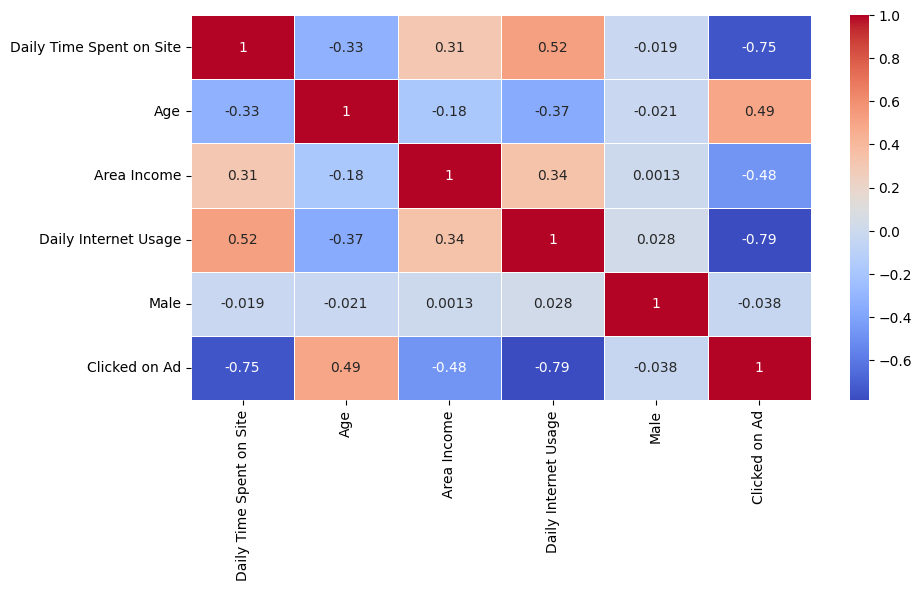


[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()


Clicked on Ad
0    500
1    500
dtype: int64


[4] Data eksplorasi dengan visualisasi


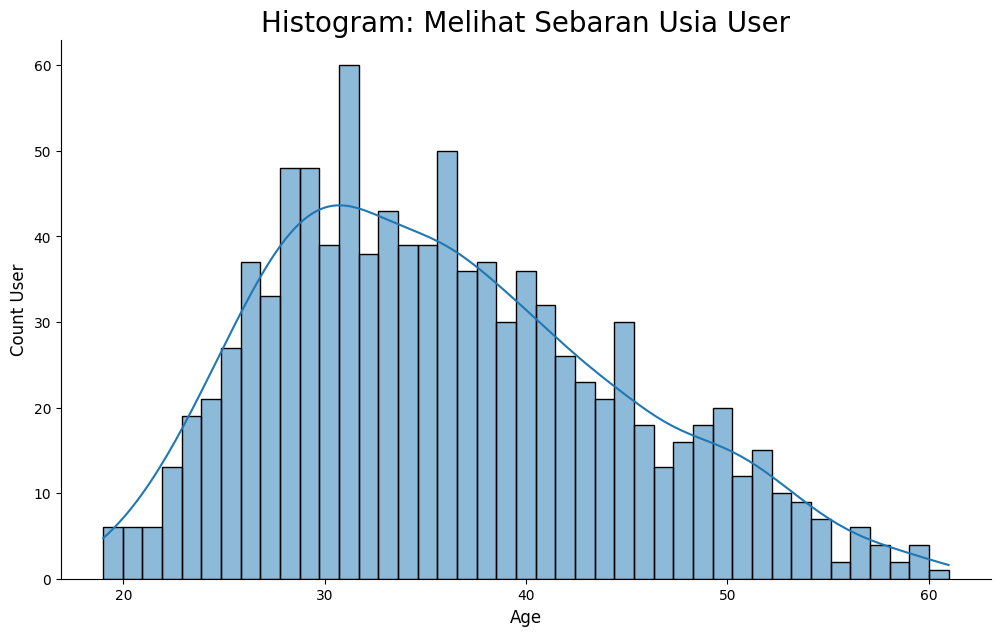


[5] Mengecek Missing Value:
Checking Missing Value: 
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64
Total Missing Value: 
0

[6] Melakukan pemodelan dengan menggunakan Logistic Regression menggunakan perbandingan 80:20 untuk training & testing
Drop Non-Numerical Data dan Label Clicked on Ad

Splitting The Data
Dimensi X_train = 800 baris dan 5 kolom
Dimensi y_train = 800 baris
Dimensi X_test = 200 baris dan 5 kolom
Dimensi y_test = 200 baris

 Modelling

 Evaluasi Model Performance
Training Accuracy: 0.900000
Testing Accuracy: 0.900000

[7] Print Confusion Matrix dan Classification Report
Apply confusion_matrix
Confusion Matrix
[[85  4]
 [16 95]]

Apply classification_report
classification Report
              precision    

In [105]:
# Eksplorasi Dataset
# Load Dataset
dataset = pd.read_csv(r"https://storage.googleapis.com/dqlab-dataset/pythonTutorial/ecommerce_banner_promo.csv")

# 1. Data Eksplorasi dengan head() - info() - describe() - shape
print("\n[1] Data eksplorasi dengan head() - info() - describe() - shape")
print("Lima data teratas: ")
display(dataset.head())

print("Penjelasan Dataset : ")
print("\nDaily Time Spent On Site -> Lama waktu user mengunjungi site (Menit)")
print("Age -> Usia (Tahun)")
print("Area Income -> Penghasilan User")
print("Daily Internet Usage -> Rata - rata waktu yang digunakan dalam sehari (Menit)")
print("Ad Topic Line -> Topic / Konten dari Banner / Iklan")
print("City -> Nama Kota / Posisi User")
print("Male -> Laki / Perempuan")
print("Country -> Nama Negara / Posisi User")
print("Timestamp -> Waktu ketika user mengklik banner / User close internet tanpa mengklik banner")
print("Clicked Ad On -> User mengklik banner / Tidak")

print("\n Informasi dataset: ")
print(dataset.info())

print("\n Statistik deskriptif dataset: ")
display(dataset.describe().T[["min","max","mean","std","50%"]])

print("\n Ukuran dataset:")
print("Dataset terdiri dari %d baris dan %d kolom"%dataset.shape)

# 2. Data Eksplorasi dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print("\n[2] Data eksplorasi dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
display(dataset.select_dtypes(include="number").corr())
fig, axs = plt.subplots(1, 1, figsize=(10,5))
sns.heatmap(dataset.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

# 3. Data Eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
print("\n[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
display(dataset.groupby(["Clicked on Ad"]).size())

# 4. Data Eksplorasi dengan visualisasi
print("\n[4] Data eksplorasi dengan visualisasi")
fig, axs = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(data=dataset, x="Age", bins=dataset["Age"].nunique(), kde=True)
plt.title("Histogram: Melihat Sebaran Usia User", fontsize=20)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count User", fontsize=12)
sns.despine(top=True)
plt.show()

# plt.figure()
# sns.pairplot(dataset)
# plt.show()

# 5. Mengecek Missing Value
print("\n[5] Mengecek Missing Value:")
print("Checking Missing Value: ")
print(dataset.isnull().sum())
print("Total Missing Value: ")
print(dataset.isnull().sum().sum())

# 6. Melakukan Pemodelan dengan menggunakan Logistic Regression menggunakan perbandingan 80:20 untuk training & testing
print("\n[6] Melakukan pemodelan dengan menggunakan Logistic Regression menggunakan perbandingan 80:20 untuk training & testing")
print("Drop Non-Numerical Data dan Label Clicked on Ad")
X = dataset.drop(["Clicked on Ad", "Ad Topic Line", "City", "Country", "Timestamp"], axis = 1)
y = dataset["Clicked on Ad"]

print('\nSplitting The Data')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dimensi X_train = %d baris dan %d kolom"%X_train.shape)
print("Dimensi y_train = %d baris"%y_train.shape)
print("Dimensi X_test = %d baris dan %d kolom"%X_test.shape)
print("Dimensi y_test = %d baris"%y_test.shape)

print("\n Modelling")
model_LogisticRegression = LogisticRegression()
model_LogisticRegression = model_LogisticRegression.fit(X_train, y_train)
y_predict = model_LogisticRegression.predict(X_test)

print("\n Evaluasi Model Performance")
print("Training Accuracy: %f"%model_LogisticRegression.score(X_train, y_train))
print("Testing Accuracy: %f"%model_LogisticRegression.score(X_test, y_test))

print("\n[7] Print Confusion Matrix dan Classification Report")
print("Apply confusion_matrix")
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("\nApply classification_report")
print("classification Report")
cr = classification_report(y_test, y_predict)
print(cr)